In [1]:
from MulticriteriaEnsemble import MulticriteriaEnsemble
from tools import dataset
from sklearn.metrics import make_scorer,accuracy_score,precision_score,recall_score,f1_score,hamming_loss,cohen_kappa_score,jaccard_similarity_score,matthews_corrcoef
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
import matplotlib
import pandas as pd
import numpy as np
from sklearn.externals import joblib
import os
from tools import dataset
import copy
from mauc_gini import*
matplotlib.rcParams['figure.figsize']=[1,1]
%matplotlib inline
metrics = {
    'Accuracy':[make_scorer(accuracy_score),-0.0000000001,1.000000001],
    'Precision(Macro)':[make_scorer(precision_score,average='macro'),-0.0000000001,1.000000001],
    'Recall(Macro)':[make_scorer(recall_score,average='macro'),-0.0000000001,1.000000001],
    'F1':[make_scorer(f1_score,average='macro'),-0.0000000001,1.000000001],
    'Hamming Loss':[make_scorer(hamming_loss,greater_is_better=False),1.000000001,-0.0000000001],
    'Cohen Kappa':[make_scorer(cohen_kappa_score),-0.0000000001,1.000000001],
    'MCC':[make_scorer(matthews_corrcoef),-0.0000000001,1.000000001],
}

In [2]:
breast_cancer = dataset(path='./datasets/breast_cancer/',name='breast_cancer')
breast_cancer.preprocess(to_numeric=True,replace_nan=True,drop_cols=True)
breast_cancer.feat_class_split()
dataset=copy.deepcopy(breast_cancer)

In [3]:
classes = dataset.y_train.append(dataset.y_test).unique()
num_classes = len(classes)
global_metric = make_scorer(MultiClassNormalizedGini,needs_proba=True,num_classes=num_classes,dt_labels=classes)

In [4]:
me = MulticriteriaEnsemble(dataset=dataset,crit_metrics=metrics,global_metric=global_metric,a=5,delta=0.026442528822114142254 ,epsilon=0.006415332193461575,jenks=False,voting='soft')

In [5]:
me.fit(mtable=True)

Multicriteria table formed!!!


<h3> Multicriteria Table </h3>

In [6]:
me.multicriteria_table.sort_values('Ranking')
me.multicriteria_table.to_csv(dataset.path+'results/multicriteria_table.csv')

<h3> Meta Table </h3>

In [7]:
me.meta_table
me.meta_table.to_csv(dataset.path+'results/meta_table.csv')

<h3>Multicriteria Ensemble(Utility) Normalized Gini Score on Test Set - No Jenks</h3>

In [8]:
me.score()

0.9853877465817764

<h3>Multicriteria Ensemble(Utility) Model Weights</h3> 

In [9]:
df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.weights)),orient='index')
df.columns=['Weight']
df.to_csv(dataset.path+'results/multicriteria_ensemble_model_weights_no_jenks.csv')
print df

                                     Weight
LR_breast_cancer_FOLD1             0.040754
LR_breast_cancer_FOLD0             0.001779
LR_breast_cancer_FOLD3             0.067061
LR_breast_cancer_FOLD2             0.060711
LR_breast_cancer_FOLD4             0.021566
KNN_breast_cancer_FOLD4            0.058446
KNN_breast_cancer_FOLD1            0.050665
KNN_breast_cancer_FOLD0            0.036336
KNN_breast_cancer_FOLD3            0.059166
KNN_breast_cancer_FOLD2            0.057764
Decision_Tree_breast_cancer_FOLD4  0.052063
Decision_Tree_breast_cancer_FOLD1  0.052063
Decision_Tree_breast_cancer_FOLD0  0.052063
Decision_Tree_breast_cancer_FOLD3  0.052063
Decision_Tree_breast_cancer_FOLD2  0.052063
GaussianNB_breast_cancer_FOLD4     0.001731
GaussianNB_breast_cancer_FOLD2     0.001597
GaussianNB_breast_cancer_FOLD3     0.001939
GaussianNB_breast_cancer_FOLD0     0.001406
GaussianNB_breast_cancer_FOLD1     0.001469
MLP_breast_cancer_FOLD4            0.000920
MLP_breast_cancer_FOLD3         

<h3>Multicriteria Ensemble(Utility) Global Utilities</h3>

In [10]:
df = pd.DataFrame.from_dict(me.utastar_model.global_utilities_post,orient='index')
df.columns=['Global Utility']
df.to_csv(dataset.path+'results/global_utilities_post.csv')

<h3>Multicriteria Ensemble(Utility) Partial Utilities</h3>

In [11]:
me.utastar_model.marginal_post

OrderedDict([('F1', [0.0, 0.0, 0.0, 0.0, 0.0055991614510251453]),
             ('MCC',
              [0.0, 0.0, 0.0, 0.0011569220588728665, 0.14285714285714285]),
             ('Cohen Kappa',
              [0.0,
               0.0010001555332990013,
               0.0010001555332990013,
               0.0010001555332990013,
               0.82816398504759581]),
             ('Precision(Macro)', [0.0, 0.0, 0.0, 0.0, 0.008460549844992964]),
             ('Hamming Loss', [0.0, 0.0, 0.0, 0.0, 0.0054077625318360977]),
             ('Recall(Macro)', [0.0, 0.0, 0.0, 0.0, 0.0041036357355710689]),
             ('Accuracy', [0.0, 0.0, 0.0, 0.0, 0.0054077625318360578])])

<h3>Multicriteria Ensemble(Utility) Criteria Weights</h3>

                    Weight
F1                0.005599
MCC               0.142857
Cohen Kappa       0.828164
Precision(Macro)  0.008461
Hamming Loss      0.005408
Recall(Macro)     0.004104
Accuracy          0.005408


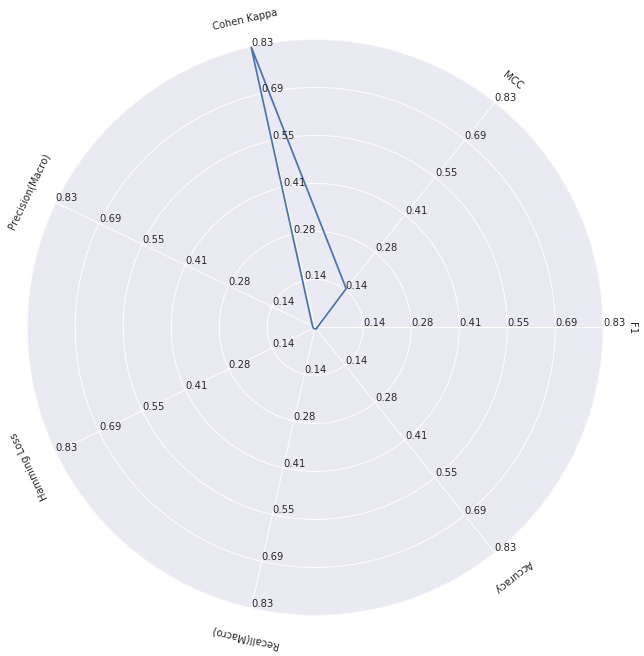

In [12]:
df = pd.DataFrame.from_dict(me.utastar_model.model_weights_post,orient='index')
df.columns=['Weight']
df.to_csv(dataset.path+'results/model_weights_post.csv')
print df
me.plot_criteria_weights()

<h3>Multicriteria Ensemble(Utility) Tau Kendall Post</h3>

In [13]:

%matplotlib inline
matplotlib.rcParams['figure.figsize']=[10,10]
me.utastar_model.tau_post

0.52247088859327162

<h3> Global Utilities Chart </h3>

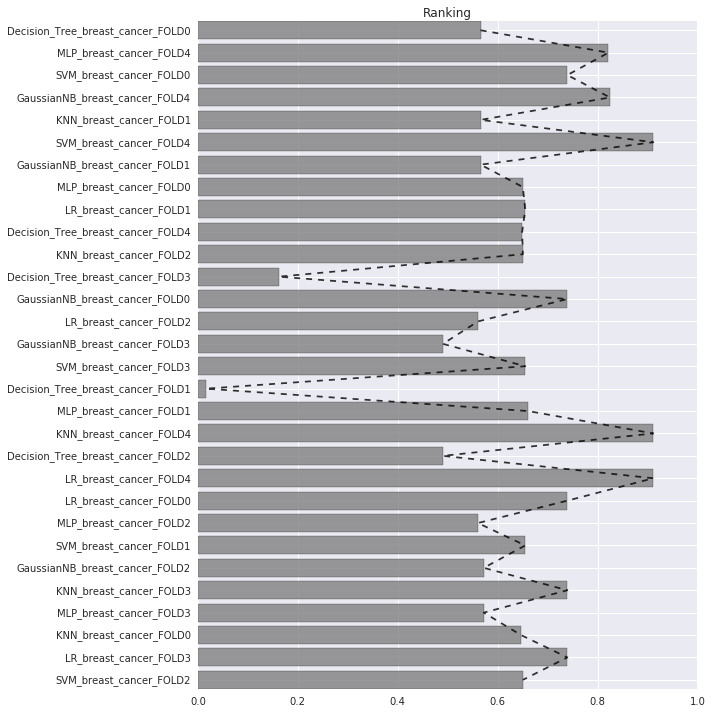

In [14]:
me.plot_global_utilities()

<h3>Predicted Global Utilities</h3>

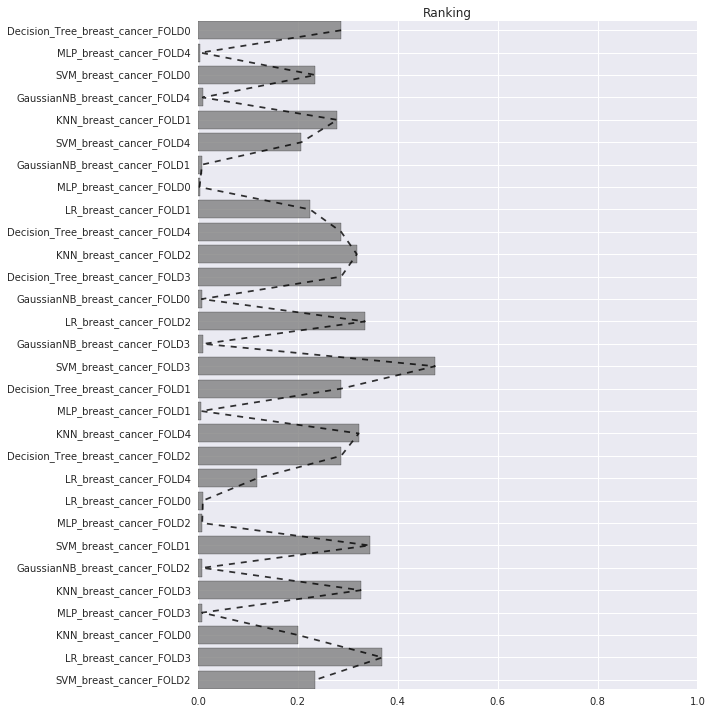

In [15]:
me.plot_global_utilities_pred()

<h3> Partial Utilities Chart </h3>

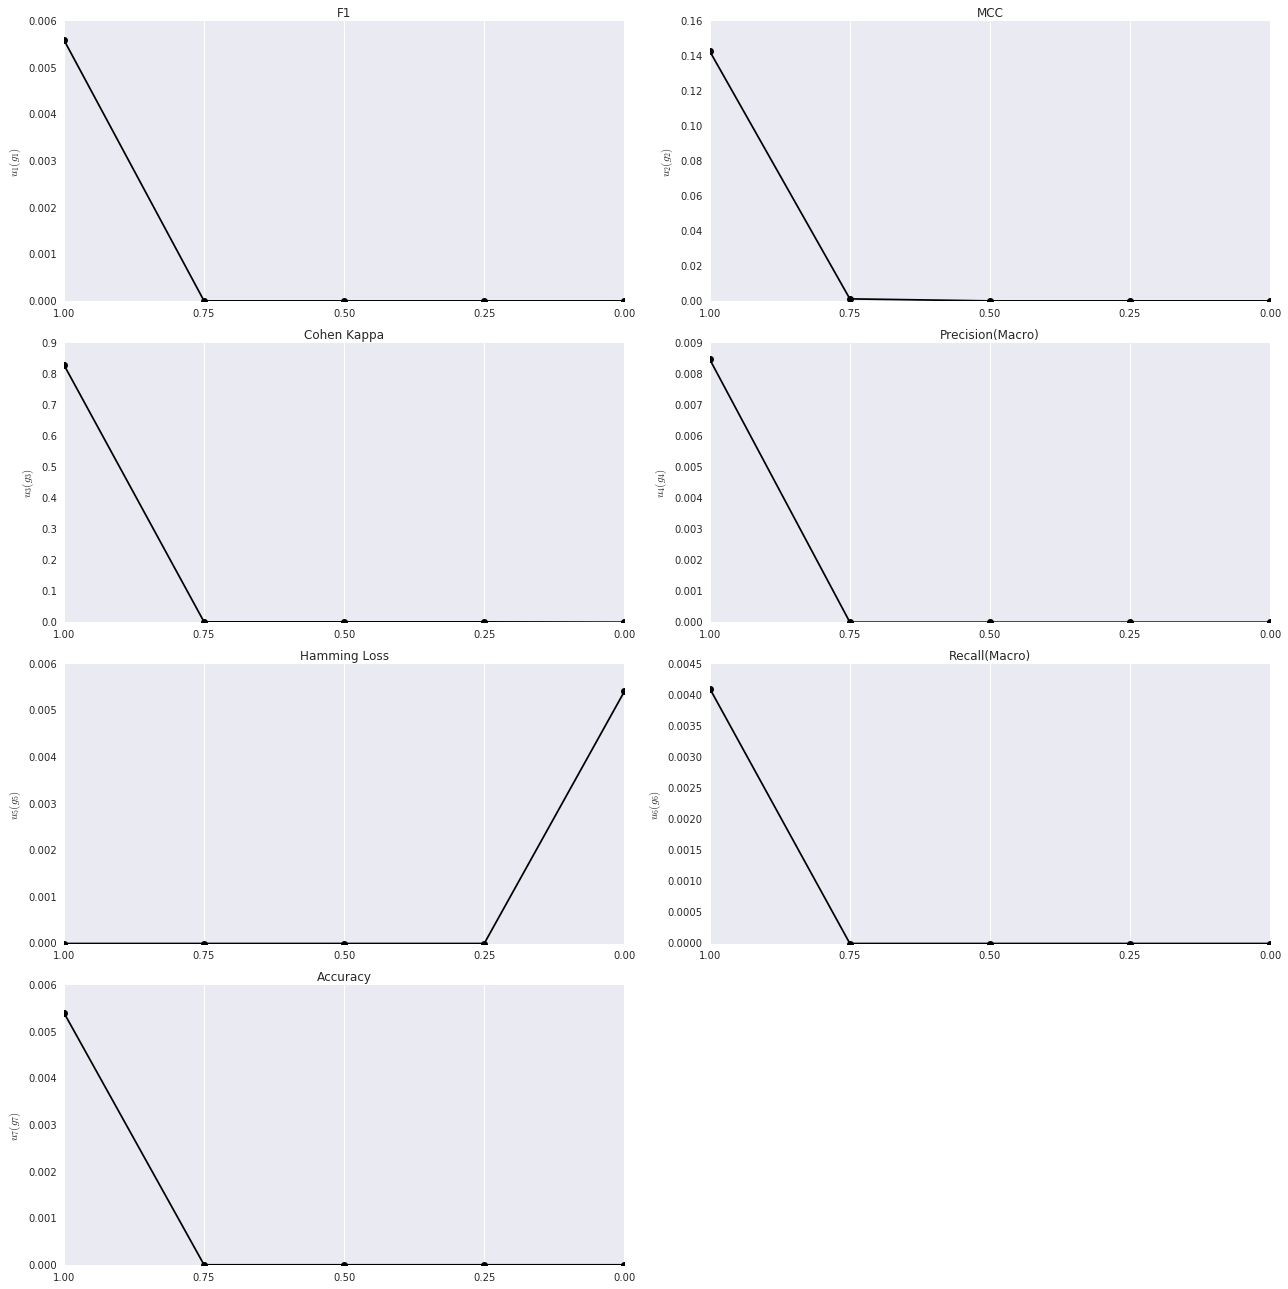

In [16]:
me.plot_partial_utilities()

<h3> Weighted Majority Voting Ensemble (Normalized Gini) Normalized Gini Score on Test Set - No Jenks </h3>

In [17]:
import jenkspy
metrics = me._get_global_metrics(me.bootstrap_models,on='test')
#natural_breaks = jenkspy.jenks_breaks(metrics, nb_class=5)
#metrics = [i if  i > natural_breaks[-2] else 0 for i in metrics]
metrics_sum = sum(metrics)
me.weights = []
for clf in metrics:
    if  clf > 0 :
        me.weights.append(clf/metrics_sum)
    
    else:
        me.weights.append(0)
me._fit_wmv()
me._get_global_metrics({'wmv':me.wmv_model},on='test')[0]

0.9714017325957625

<h3> Weighted Majority Voting Ensemble (Normalized Gini) Model Weights - No Jenks </h3>

                                     Weight
LR_breast_cancer_FOLD1             0.034511
LR_breast_cancer_FOLD0             0.032072
LR_breast_cancer_FOLD3             0.035089
LR_breast_cancer_FOLD2             0.034872
LR_breast_cancer_FOLD4             0.034068
KNN_breast_cancer_FOLD4            0.033843
KNN_breast_cancer_FOLD1            0.033892
KNN_breast_cancer_FOLD0            0.033018
KNN_breast_cancer_FOLD3            0.034008
KNN_breast_cancer_FOLD2            0.034275
Decision_Tree_breast_cancer_FOLD4  0.031366
Decision_Tree_breast_cancer_FOLD1  0.031366
Decision_Tree_breast_cancer_FOLD0  0.031366
Decision_Tree_breast_cancer_FOLD3  0.031366
Decision_Tree_breast_cancer_FOLD2  0.031366
GaussianNB_breast_cancer_FOLD4     0.034646
GaussianNB_breast_cancer_FOLD2     0.034650
GaussianNB_breast_cancer_FOLD3     0.034549
GaussianNB_breast_cancer_FOLD0     0.034166
GaussianNB_breast_cancer_FOLD1     0.034433
MLP_breast_cancer_FOLD4            0.031246
MLP_breast_cancer_FOLD3         

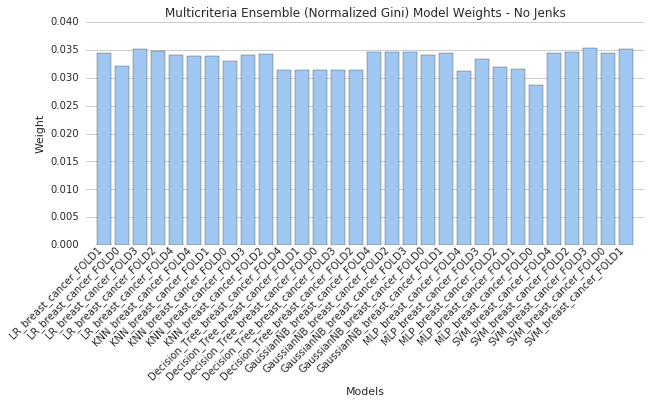

In [18]:
df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.weights)),orient='index')
df.columns=['Weight']
df.to_csv(dataset.path+'results/wmv_ensemble_normalized_gini_model_weights_no_jenks.csv')
print df
me.plot_model_weights(title='Multicriteria Ensemble (Normalized Gini) Model Weights - No Jenks')

<h3>Multicriteria Ensemble(Utility) Normalized Gini Score on Test Set - With Jenks (Default Cluster Limit = 2)</h3>

In [19]:
me.jenks=True
me.fit(mtable=False)
me.score()

0.9818390564659221

<h3>Multicriteria Ensemble(Utility) Model Weights - With Jenks (Default Cluster Limit = 2)</h3>

                                     Weight
LR_breast_cancer_FOLD1             0.000000
LR_breast_cancer_FOLD0             0.000000
LR_breast_cancer_FOLD3             0.437632
LR_breast_cancer_FOLD2             0.000000
LR_breast_cancer_FOLD4             0.000000
KNN_breast_cancer_FOLD4            0.000000
KNN_breast_cancer_FOLD1            0.000000
KNN_breast_cancer_FOLD0            0.000000
KNN_breast_cancer_FOLD3            0.000000
KNN_breast_cancer_FOLD2            0.000000
Decision_Tree_breast_cancer_FOLD4  0.000000
Decision_Tree_breast_cancer_FOLD1  0.000000
Decision_Tree_breast_cancer_FOLD0  0.000000
Decision_Tree_breast_cancer_FOLD3  0.000000
Decision_Tree_breast_cancer_FOLD2  0.000000
GaussianNB_breast_cancer_FOLD4     0.000000
GaussianNB_breast_cancer_FOLD2     0.000000
GaussianNB_breast_cancer_FOLD3     0.000000
GaussianNB_breast_cancer_FOLD0     0.000000
GaussianNB_breast_cancer_FOLD1     0.000000
MLP_breast_cancer_FOLD4            0.000000
MLP_breast_cancer_FOLD3         

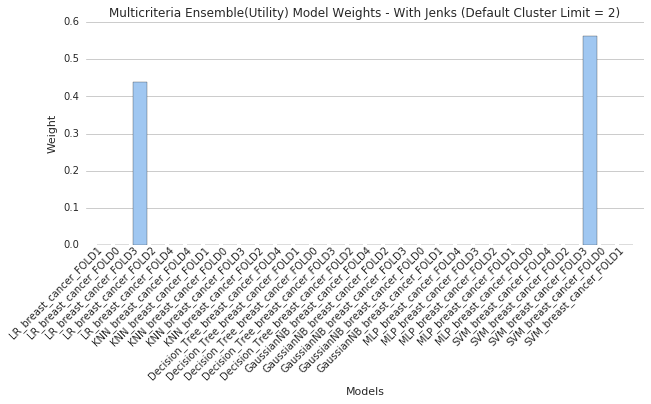

In [20]:
df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.weights)),orient='index')
df.columns=['Weight']
df.to_csv(dataset.path+'results/multicriteria_ensemble_model_weights_with_jenks_l2.csv')
print df
me.plot_model_weights(title='Multicriteria Ensemble(Utility) Model Weights - With Jenks (Default Cluster Limit = 2)')

<h3>Multicriteria Ensemble(Utility) Normalized Gini Score on Test Set,Model weights and Number of models in the ensemble - With Jenks</h3>

Cluster Limit: 0
Multicriteria Ensemble Normalized Gini Score: 0.985388
Number of models in the ensemble: 30

                                     Weight
LR_breast_cancer_FOLD1             0.040754
LR_breast_cancer_FOLD0             0.001779
LR_breast_cancer_FOLD3             0.067061
LR_breast_cancer_FOLD2             0.060711
LR_breast_cancer_FOLD4             0.021566
KNN_breast_cancer_FOLD4            0.058446
KNN_breast_cancer_FOLD1            0.050665
KNN_breast_cancer_FOLD0            0.036336
KNN_breast_cancer_FOLD3            0.059166
KNN_breast_cancer_FOLD2            0.057764
Decision_Tree_breast_cancer_FOLD4  0.052063
Decision_Tree_breast_cancer_FOLD1  0.052063
Decision_Tree_breast_cancer_FOLD0  0.052063
Decision_Tree_breast_cancer_FOLD3  0.052063
Decision_Tree_breast_cancer_FOLD2  0.052063
GaussianNB_breast_cancer_FOLD4     0.001731
GaussianNB_breast_cancer_FOLD2     0.001597
GaussianNB_breast_cancer_FOLD3     0.001939
GaussianNB_breast_cancer_FOLD0     0.001406
GaussianNB

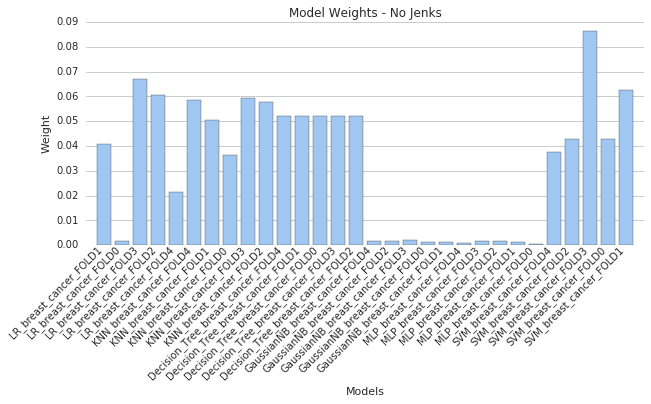

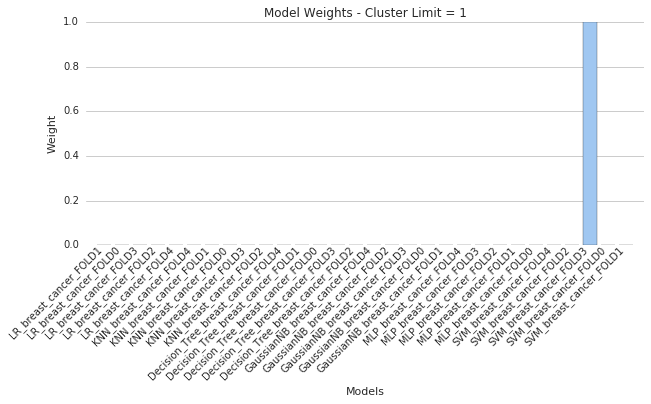

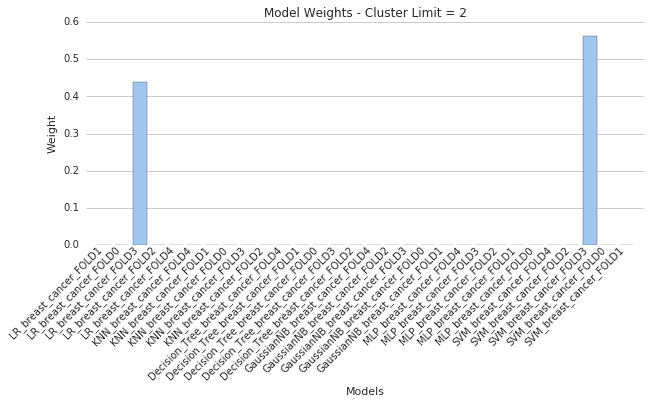

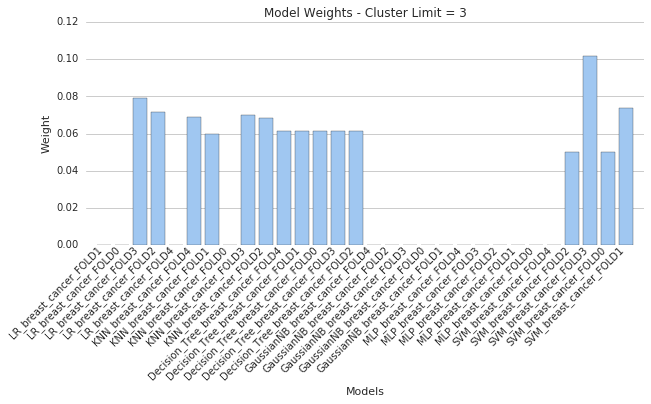

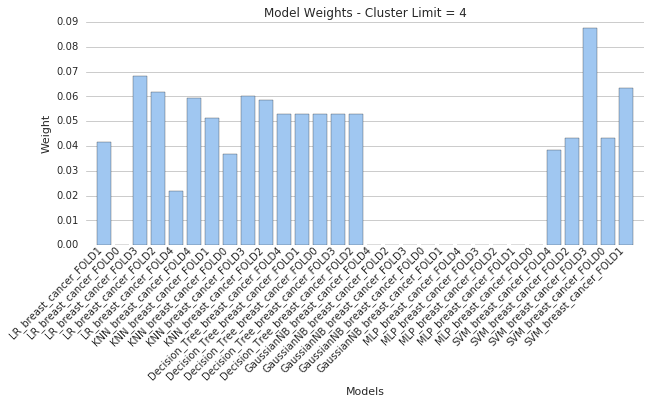

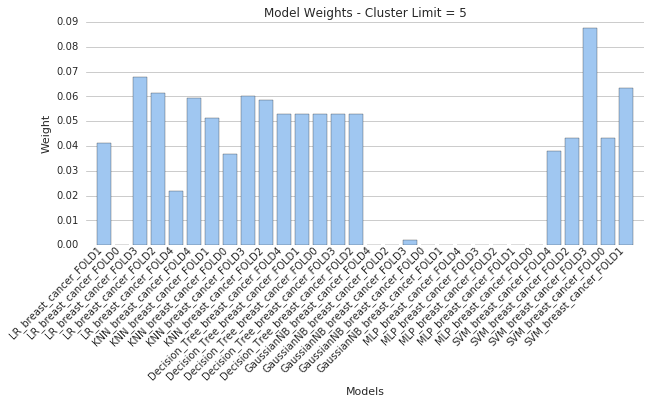

In [21]:
for i in range(0,6,1):
    me.jenks_limit = i
    me.weights = []
    me._get_clfs_weights()
    me._fit_wmv()
    model_counter = 0;
    for j in me.weights:
        if j>0:
            model_counter+=1
    print 'Cluster Limit: %i'%i
    print 'Multicriteria Ensemble Normalized Gini Score: %f'%me.score()
    print 'Number of models in the ensemble: %i\n'%model_counter
    df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.weights)),orient='index')
    df.columns=['Weight']
    df.to_csv(dataset.path+'results/multicriteria_ensemble_model_weights_with_jenks_l%i.csv'%i)
    print df
    if i == 0:
        title='Model Weights - No Jenks'
    else:
        title=str('Model Weights - Cluster Limit = %i'%i)
    me.plot_model_weights(title=title)

<h3> Jenks - Natural Breaks - Based on Utility</h3>

In [22]:
clusters = []
for i in range(0,len(me.natural_breaks)):
    if i ==0:
        clusters.append(str('[%f,%f)'%(0,me.natural_breaks[i])))
    else:
        clusters.append(str('[%f,%f)'%(me.natural_breaks[i-1],me.natural_breaks[i])))
df = pd.DataFrame(clusters,columns=['Cluster'])
df.to_csv(dataset.path+'results/multicriteria_ensemble_jenks_natural_breaks.csv')
df

,Cluster
0,"[0.000000,0.003273)"
1,"[0.003273,0.010681)"
2,"[0.010681,0.118767)"
3,"[0.118767,0.235198)"
4,"[0.235198,0.369324)"
5,"[0.369324,0.474589)"


<h3>Weighted Majority Voting Ensemble(Normalized Gini) Normalized Gini Score on Test Set - With Jenks</h3>

In [23]:
metrics = me._get_global_metrics(me.bootstrap_models,on='test')
natural_breaks = jenkspy.jenks_breaks(metrics, nb_class=5)
metrics = [i if  i >= natural_breaks[-2] else 0 for i in metrics]
metrics_sum = sum(metrics)
me.weights = []
for clf in metrics:
    if  clf > 0 :
        me.weights.append(clf/metrics_sum)
    
    else:
        me.weights.append(0)
me._fit_wmv()
me._get_global_metrics({'wmv':me.wmv_model},on='test')[0]

0.9759941550986326

<h3>Weighted Majority Voting Ensemble(Normalized Gini) Model Weights</h3>

                                     Weight
LR_breast_cancer_FOLD1             0.000000
LR_breast_cancer_FOLD0             0.000000
LR_breast_cancer_FOLD3             0.200382
LR_breast_cancer_FOLD2             0.199138
LR_breast_cancer_FOLD4             0.000000
KNN_breast_cancer_FOLD4            0.000000
KNN_breast_cancer_FOLD1            0.000000
KNN_breast_cancer_FOLD0            0.000000
KNN_breast_cancer_FOLD3            0.000000
KNN_breast_cancer_FOLD2            0.000000
Decision_Tree_breast_cancer_FOLD4  0.000000
Decision_Tree_breast_cancer_FOLD1  0.000000
Decision_Tree_breast_cancer_FOLD0  0.000000
Decision_Tree_breast_cancer_FOLD3  0.000000
Decision_Tree_breast_cancer_FOLD2  0.000000
GaussianNB_breast_cancer_FOLD4     0.000000
GaussianNB_breast_cancer_FOLD2     0.197874
GaussianNB_breast_cancer_FOLD3     0.000000
GaussianNB_breast_cancer_FOLD0     0.000000
GaussianNB_breast_cancer_FOLD1     0.000000
MLP_breast_cancer_FOLD4            0.000000
MLP_breast_cancer_FOLD3         

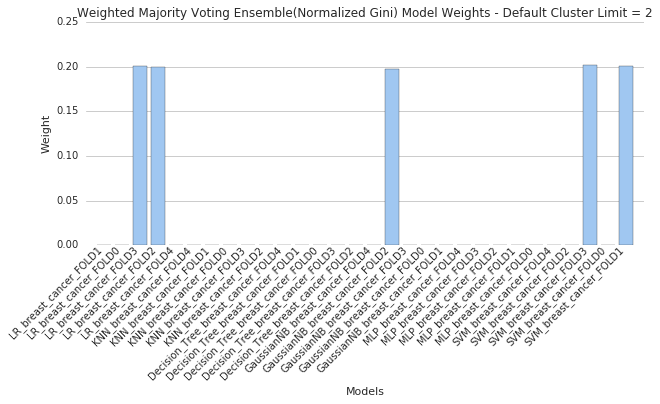

In [24]:
df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.weights)),orient='index')
df.columns=['Weight']
df.to_csv(dataset.path+'results/wmv_ensemble_normalized_gini_model_weights_with_jenks_l.csv')
print df
me.plot_model_weights(title='Weighted Majority Voting Ensemble(Normalized Gini) Model Weights - Default Cluster Limit = 2')

<h3>Weighted Majority Voting Ensemble(Normalized Gini) Normalized Gini Score on Test Set,Model weights and Number of models in the ensemble - With Jenks</h3>

Cluster Limit: 0
Weighted Majority Voting Ensemble(Normalized Gini) Normalized Gini Score: 0.971402
Number of models in the ensemble: 30

                                     Weight
LR_breast_cancer_FOLD1             0.034511
LR_breast_cancer_FOLD0             0.032072
LR_breast_cancer_FOLD3             0.035089
LR_breast_cancer_FOLD2             0.034872
LR_breast_cancer_FOLD4             0.034068
KNN_breast_cancer_FOLD4            0.033843
KNN_breast_cancer_FOLD1            0.033892
KNN_breast_cancer_FOLD0            0.033018
KNN_breast_cancer_FOLD3            0.034008
KNN_breast_cancer_FOLD2            0.034275
Decision_Tree_breast_cancer_FOLD4  0.031366
Decision_Tree_breast_cancer_FOLD1  0.031366
Decision_Tree_breast_cancer_FOLD0  0.031366
Decision_Tree_breast_cancer_FOLD3  0.031366
Decision_Tree_breast_cancer_FOLD2  0.031366
GaussianNB_breast_cancer_FOLD4     0.034646
GaussianNB_breast_cancer_FOLD2     0.034650
GaussianNB_breast_cancer_FOLD3     0.034549
GaussianNB_breast_cancer_F

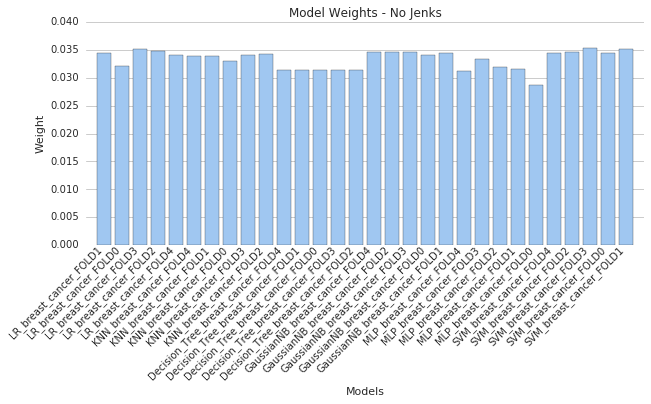

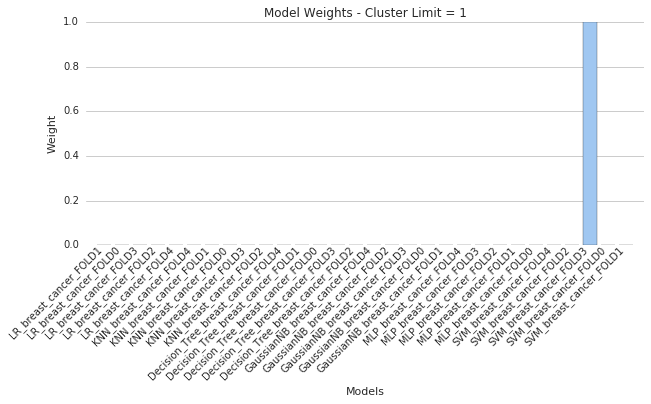

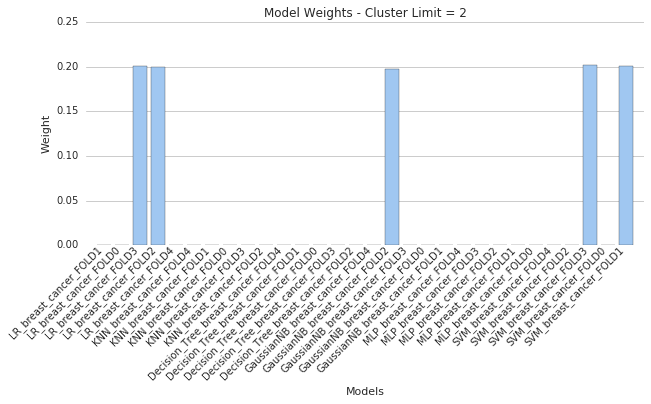

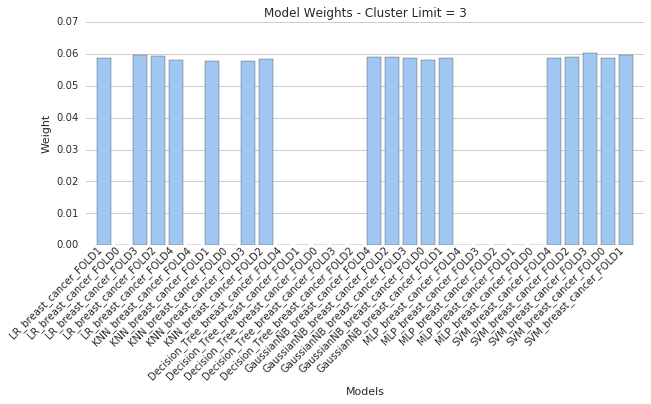

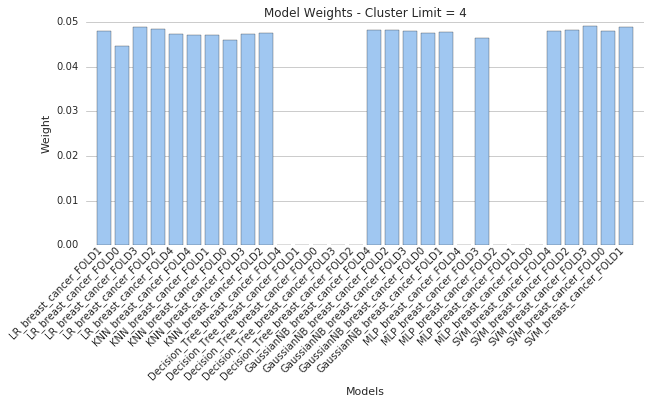

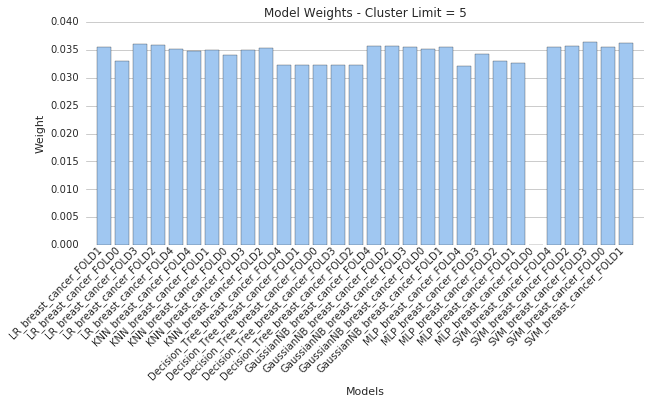

In [25]:
metrics = me._get_global_metrics(me.bootstrap_models,on='test')
m = metrics
natural_breaks = jenkspy.jenks_breaks(metrics, nb_class=5)
for i in range(0,6,1):
    metrics = m
    metrics = [j if  j >= natural_breaks[-i] else 0 for j in metrics]
    metrics_sum = sum(metrics)
    me.weights = []
    for clf in metrics:
        if  clf > 0 :
            me.weights.append(clf/metrics_sum)
        else:
            me.weights.append(0)
    me._fit_wmv()
    model_counter = 0;
    for k in me.weights:
        if k>0:
            model_counter+=1
    print 'Cluster Limit: %i'%i
    print 'Weighted Majority Voting Ensemble(Normalized Gini) Normalized Gini Score: %f'%me.score()
    print 'Number of models in the ensemble: %i\n'%model_counter
    df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.weights)),orient='index')
    df.columns=['Weight']
    df.to_csv(dataset.path+'results/wmv_ensemble_normalized_gini_model_weights_with_jenks_l%i.csv'%i)
    print df
    if i == 0:
        title='Model Weights - No Jenks'
    else:
        title=str('Model Weights - Cluster Limit = %i'%i)
    me.plot_model_weights(title=title)

<h3> Jenks - Natural Breaks - Based on Normalized Gini</h3>

In [26]:
clusters = []
for i in range(0,len(me.natural_breaks)):
    if i ==0:
        clusters.append(str('[%f,%f)'%(0,me.natural_breaks[i])))
    else:
        clusters.append(str('[%f,%f)'%(me.natural_breaks[i-1],me.natural_breaks[i])))
df = pd.DataFrame(clusters,columns=['Cluster'])
df.to_csv(dataset.path+'results/wmv_ensemble_normalized_gini_jenks_natural_breaks.csv')
df

,Cluster
0,"[0.000000,0.003273)"
1,"[0.003273,0.010681)"
2,"[0.010681,0.118767)"
3,"[0.118767,0.235198)"
4,"[0.235198,0.369324)"
5,"[0.369324,0.474589)"


<h3> Weighted Majority Voting Ensemble (Equal Weights, 1/(number_of_models)) </h3>

In [27]:
me.weights = []
for clf in me.bootstrap_models:
    me.weights.append(float(1)/float(len(me.bootstrap_models)))
me.weights
me._fit_wmv()
me._get_global_metrics({'wmv':me.wmv_model},on='test')[0]

0.9707754931635528

<h3>Base Models Normalized Gini Score</h3>

In [28]:
df = pd.DataFrame.from_dict(dict(zip(me.models.keys(),me._get_global_metrics(me.models,on='test'))),orient='index')
df.columns = ['Normalized Gini']
df.to_csv(dataset.path+'results/base_learners_normalized_gini_score.csv')

<h3> Base K-Fold Models Normalized Ginis Score</h3>

In [29]:
df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me._get_global_metrics(me.bootstrap_models,on='test'))),orient='index')
df.columns = ['Normalized Gini']
df.to_csv(dataset.path+'results/base_k_fold_learners_normalized_gini_score.csv')

In [30]:
df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.global_utilities)),orient='index')
df.columns=['Global Utility']
df.to_csv(dataset.path+'results/multicriteria_ensemble_predicted_global_utilities.csv')
print df

                                   Global Utility
LR_breast_cancer_FOLD1                   0.224443
LR_breast_cancer_FOLD0                   0.009797
LR_breast_cancer_FOLD3                   0.369324
LR_breast_cancer_FOLD2                   0.334348
LR_breast_cancer_FOLD4                   0.118767
KNN_breast_cancer_FOLD4                  0.321874
KNN_breast_cancer_FOLD1                  0.279025
KNN_breast_cancer_FOLD0                  0.200111
KNN_breast_cancer_FOLD3                  0.325840
KNN_breast_cancer_FOLD2                  0.318118
Decision_Tree_breast_cancer_FOLD4        0.286721
Decision_Tree_breast_cancer_FOLD1        0.286721
Decision_Tree_breast_cancer_FOLD0        0.286721
Decision_Tree_breast_cancer_FOLD3        0.286721
Decision_Tree_breast_cancer_FOLD2        0.286721
GaussianNB_breast_cancer_FOLD4           0.009531
GaussianNB_breast_cancer_FOLD2           0.008797
GaussianNB_breast_cancer_FOLD3           0.010681
GaussianNB_breast_cancer_FOLD0           0.007743


In [31]:
me.multicriteria_table.sort_values('Ranking').to_csv('./statlog_me_table.csv')

In [32]:
me.utastar_model.tau_post

0.52247088859327162